### Problem Statement 

The Vehicle Insurance business is a multi-billion dollar industry. Every year millions and millions of premiums are paid, and a huge amount of claims also pile up. 

You have to step into the shoes of a data scientist who is building models to help an insurance company understand which claims are worth rejecting and claims which should be accepted for reimbursement. 

### Import the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import warnings
warnings.filterwarnings('ignore')

### Import the data

In [2]:
train_df=pd.read_csv("train.csv")
train_df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0,after 2015,0,0,37379,11000,0,0,0,0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1,before 2015,1,0,10238,9000,0,0,0,1,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1,before 2015,1,1,10238,12000,0,0,0,1,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1,before 2015,0,1,92099,6000,1,0,0,1,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1,after 2015,1,1,32122,15000,0,0,1,0,Sedan


In [3]:
test_df=pd.read_csv("test.csv")
test_df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV


In [4]:
train_df.shape

(87285, 18)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  int64  
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  int64  
 10  CHILDREN             87285 non-null  int64  
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

In [6]:
train_df.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE'],
      dtype='object')

### Categorical Variable

In [7]:
train_df_cat = train_df.select_dtypes(object)

In [8]:
for var in train_df_cat:
    print('The feature name is:',var)
    print(train_df[var].value_counts(normalize=True)*100)
    print('*'*50)

The feature name is: AGE
40-64    32.041015
65+      31.389128
26-39    19.106376
16-25    17.463482
Name: AGE, dtype: float64
**************************************************
The feature name is: GENDER
male      62.30051
female    37.69949
Name: GENDER, dtype: float64
**************************************************
The feature name is: DRIVING_EXPERIENCE
20-29y    35.711749
0-9y      31.533482
10-19y    23.880392
30y+       8.874377
Name: DRIVING_EXPERIENCE, dtype: float64
**************************************************
The feature name is: EDUCATION
high school    44.390216
university     29.748525
none           25.861259
Name: EDUCATION, dtype: float64
**************************************************
The feature name is: INCOME
upper class      48.903019
working class    23.229650
middle class     13.980638
poverty          13.886693
Name: INCOME, dtype: float64
**************************************************
The feature name is: VEHICLE_YEAR
before 2015    54.692101


### Numerical Variable

In [9]:
train_df_num = train_df.select_dtypes('number')

In [10]:
for var in train_df_num:
    print('The feature name is:',var)
    print(train_df[var].value_counts(normalize=True)*100)
    print('*'*50)

The feature name is: ID
101       0.124878
102       0.040099
103       0.010311
104       0.010311
106       0.009165
            ...   
858173    0.001146
977142    0.001146
607797    0.001146
212047    0.001146
164608    0.001146
Name: ID, Length: 82657, dtype: float64
**************************************************
The feature name is: CREDIT_SCORE
0.442071    0.002291
0.583765    0.002291
0.501793    0.002291
0.505614    0.002291
0.755054    0.002291
              ...   
0.688666    0.001146
0.761721    0.001146
0.528849    0.001146
0.717558    0.001146
0.763635    0.001146
Name: CREDIT_SCORE, Length: 87262, dtype: float64
**************************************************
The feature name is: VEHICLE_OWNERSHIP
1    82.775964
0    17.224036
Name: VEHICLE_OWNERSHIP, dtype: float64
**************************************************
The feature name is: MARRIED
1    58.496878
0    41.503122
Name: MARRIED, dtype: float64
**************************************************
The featur

### Change the datatype

In [11]:
train_df[['VEHICLE_OWNERSHIP','MARRIED','CHILDREN']]=train_df[['VEHICLE_OWNERSHIP','MARRIED','CHILDREN']].astype('object')

In [12]:
train_df.dtypes

ID                       int64
AGE                     object
GENDER                  object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP       object
VEHICLE_YEAR            object
MARRIED                 object
CHILDREN                object
POSTAL_CODE              int64
ANNUAL_MILEAGE           int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                  int64
TYPE_OF_VEHICLE         object
dtype: object

### Check the missing values

In [13]:
train_df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

From the above we can see that there is no missing value but we can see in education variable we have null value so we will impute this value with mode of the variable.

In [14]:
train_df["EDUCATION"]=train_df["EDUCATION"].replace('none',np.nan)

In [15]:
train_df["EDUCATION"] = train_df["EDUCATION"].fillna(train_df["EDUCATION"].mode()[0])

In [16]:
train_df_num = train_df.select_dtypes('number')

In [17]:
train_df_cat= train_df.select_dtypes(object)
train_df_cat.columns

Index(['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
       'TYPE_OF_VEHICLE'],
      dtype='object')

In [18]:
train_df_cat['CHILDREN'].value_counts(normalize=True)*100

1    51.974566
0    48.025434
Name: CHILDREN, dtype: float64

In [19]:
train_df_cat['AGE'] = train_df_cat['AGE'].replace('16-25',0).replace('26-39',0).replace('40-64',1).replace('65+',1)

In [20]:
train_df_cat['GENDER'] = train_df_cat['GENDER'].replace('male',0).replace('female',1)

In [21]:
train_df_cat['DRIVING_EXPERIENCE'] = train_df_cat['DRIVING_EXPERIENCE'].replace('0-9y',0).replace('10-19y',0).replace('20-29y',1).replace('30y+',1)             

In [22]:
train_df_cat['EDUCATION'] = train_df_cat['EDUCATION'].replace('high school',0).replace('university',1)

In [23]:
train_df_cat['INCOME'] = train_df_cat['INCOME'].replace('poverty',0).replace('middle class',0).replace('working class',1).replace('upper class',1)

In [24]:
train_df_cat['VEHICLE_YEAR'] = train_df_cat['VEHICLE_YEAR'].replace('before 2015',0).replace('after 2015',1)

In [25]:
train_df_cat['TYPE_OF_VEHICLE'] = train_df_cat['TYPE_OF_VEHICLE'].replace('SUV',0).replace('HatchBack',1).replace('Sedan',0).replace('Sports Car',1)

In [26]:
train_df_cat.isnull().sum()

AGE                   0
GENDER                0
DRIVING_EXPERIENCE    0
EDUCATION             0
INCOME                0
VEHICLE_OWNERSHIP     0
VEHICLE_YEAR          0
MARRIED               0
CHILDREN              0
TYPE_OF_VEHICLE       0
dtype: int64

### Check the outliers

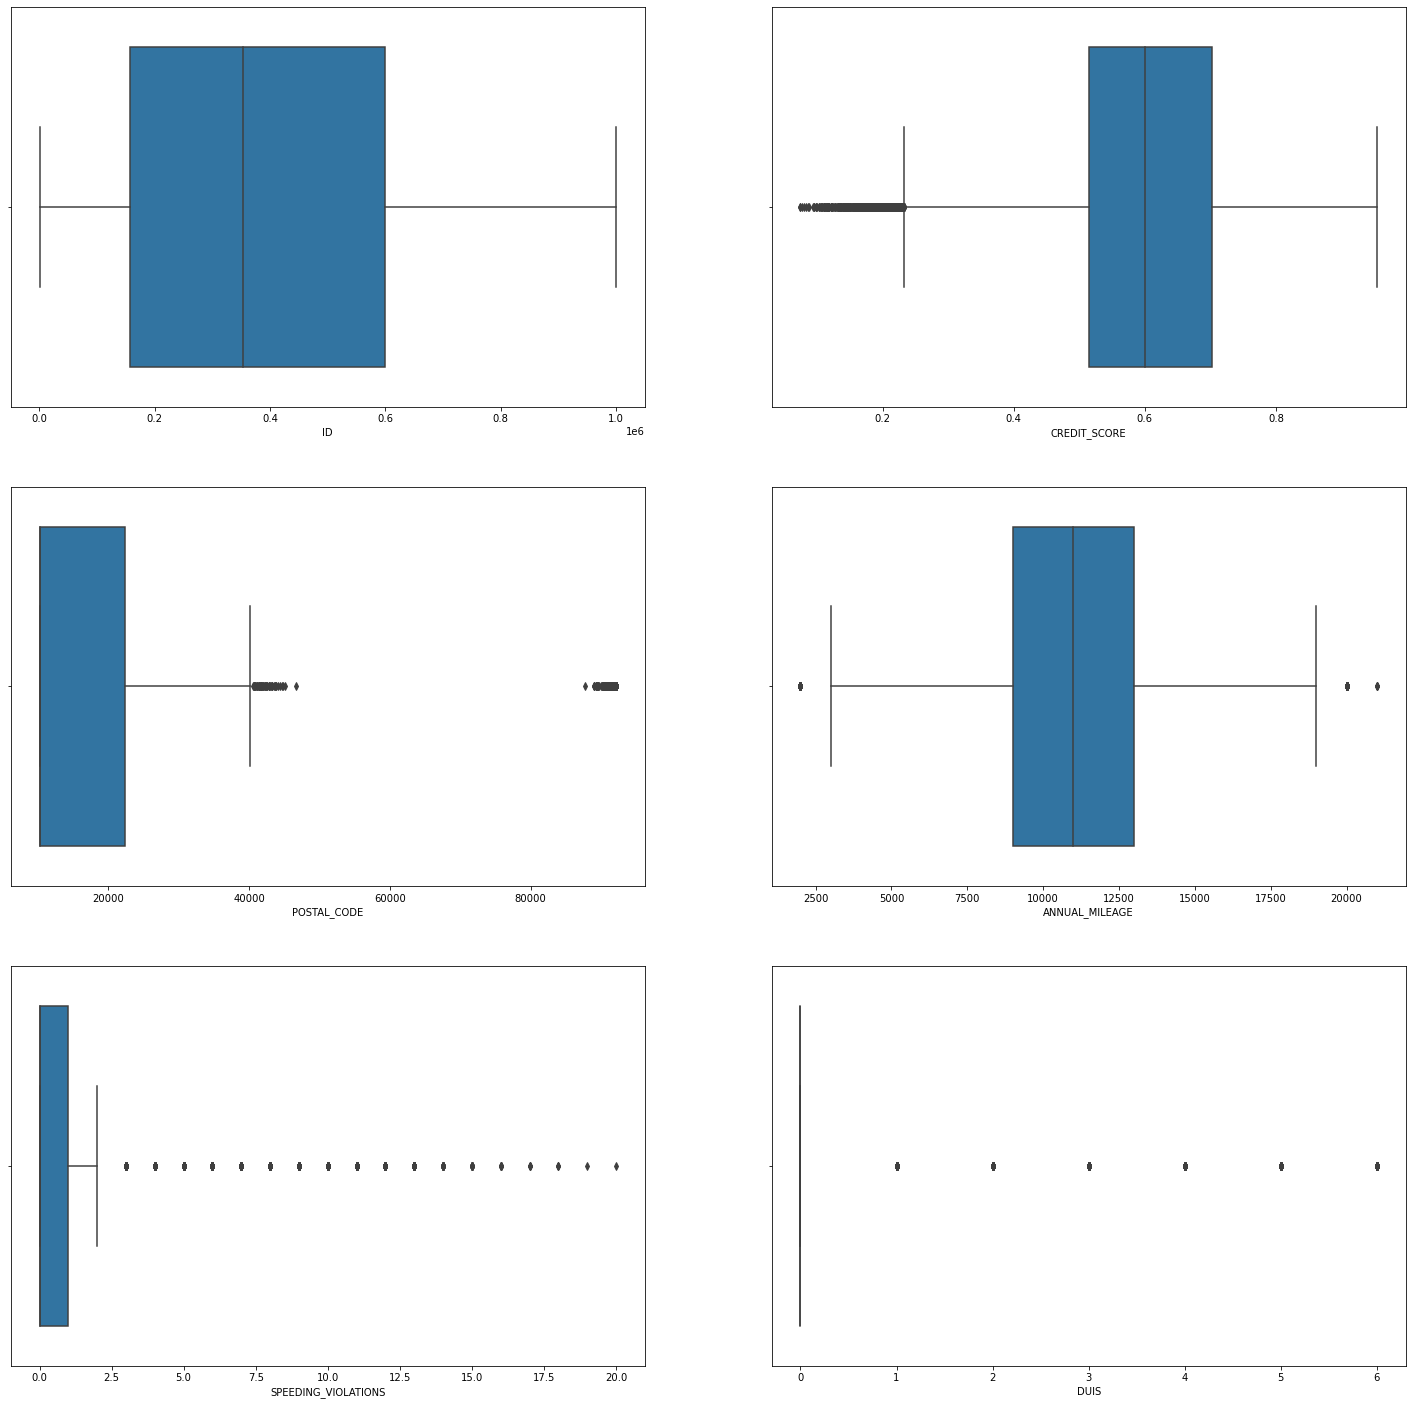

In [27]:
fig, ax=plt.subplots(3,2,figsize=(25,25))
for var, subplot in zip(train_df_num.columns,ax.flatten()):
    sns.boxplot(train_df_num[var],ax=subplot)
    
plt.show()

### Univariate Analysis

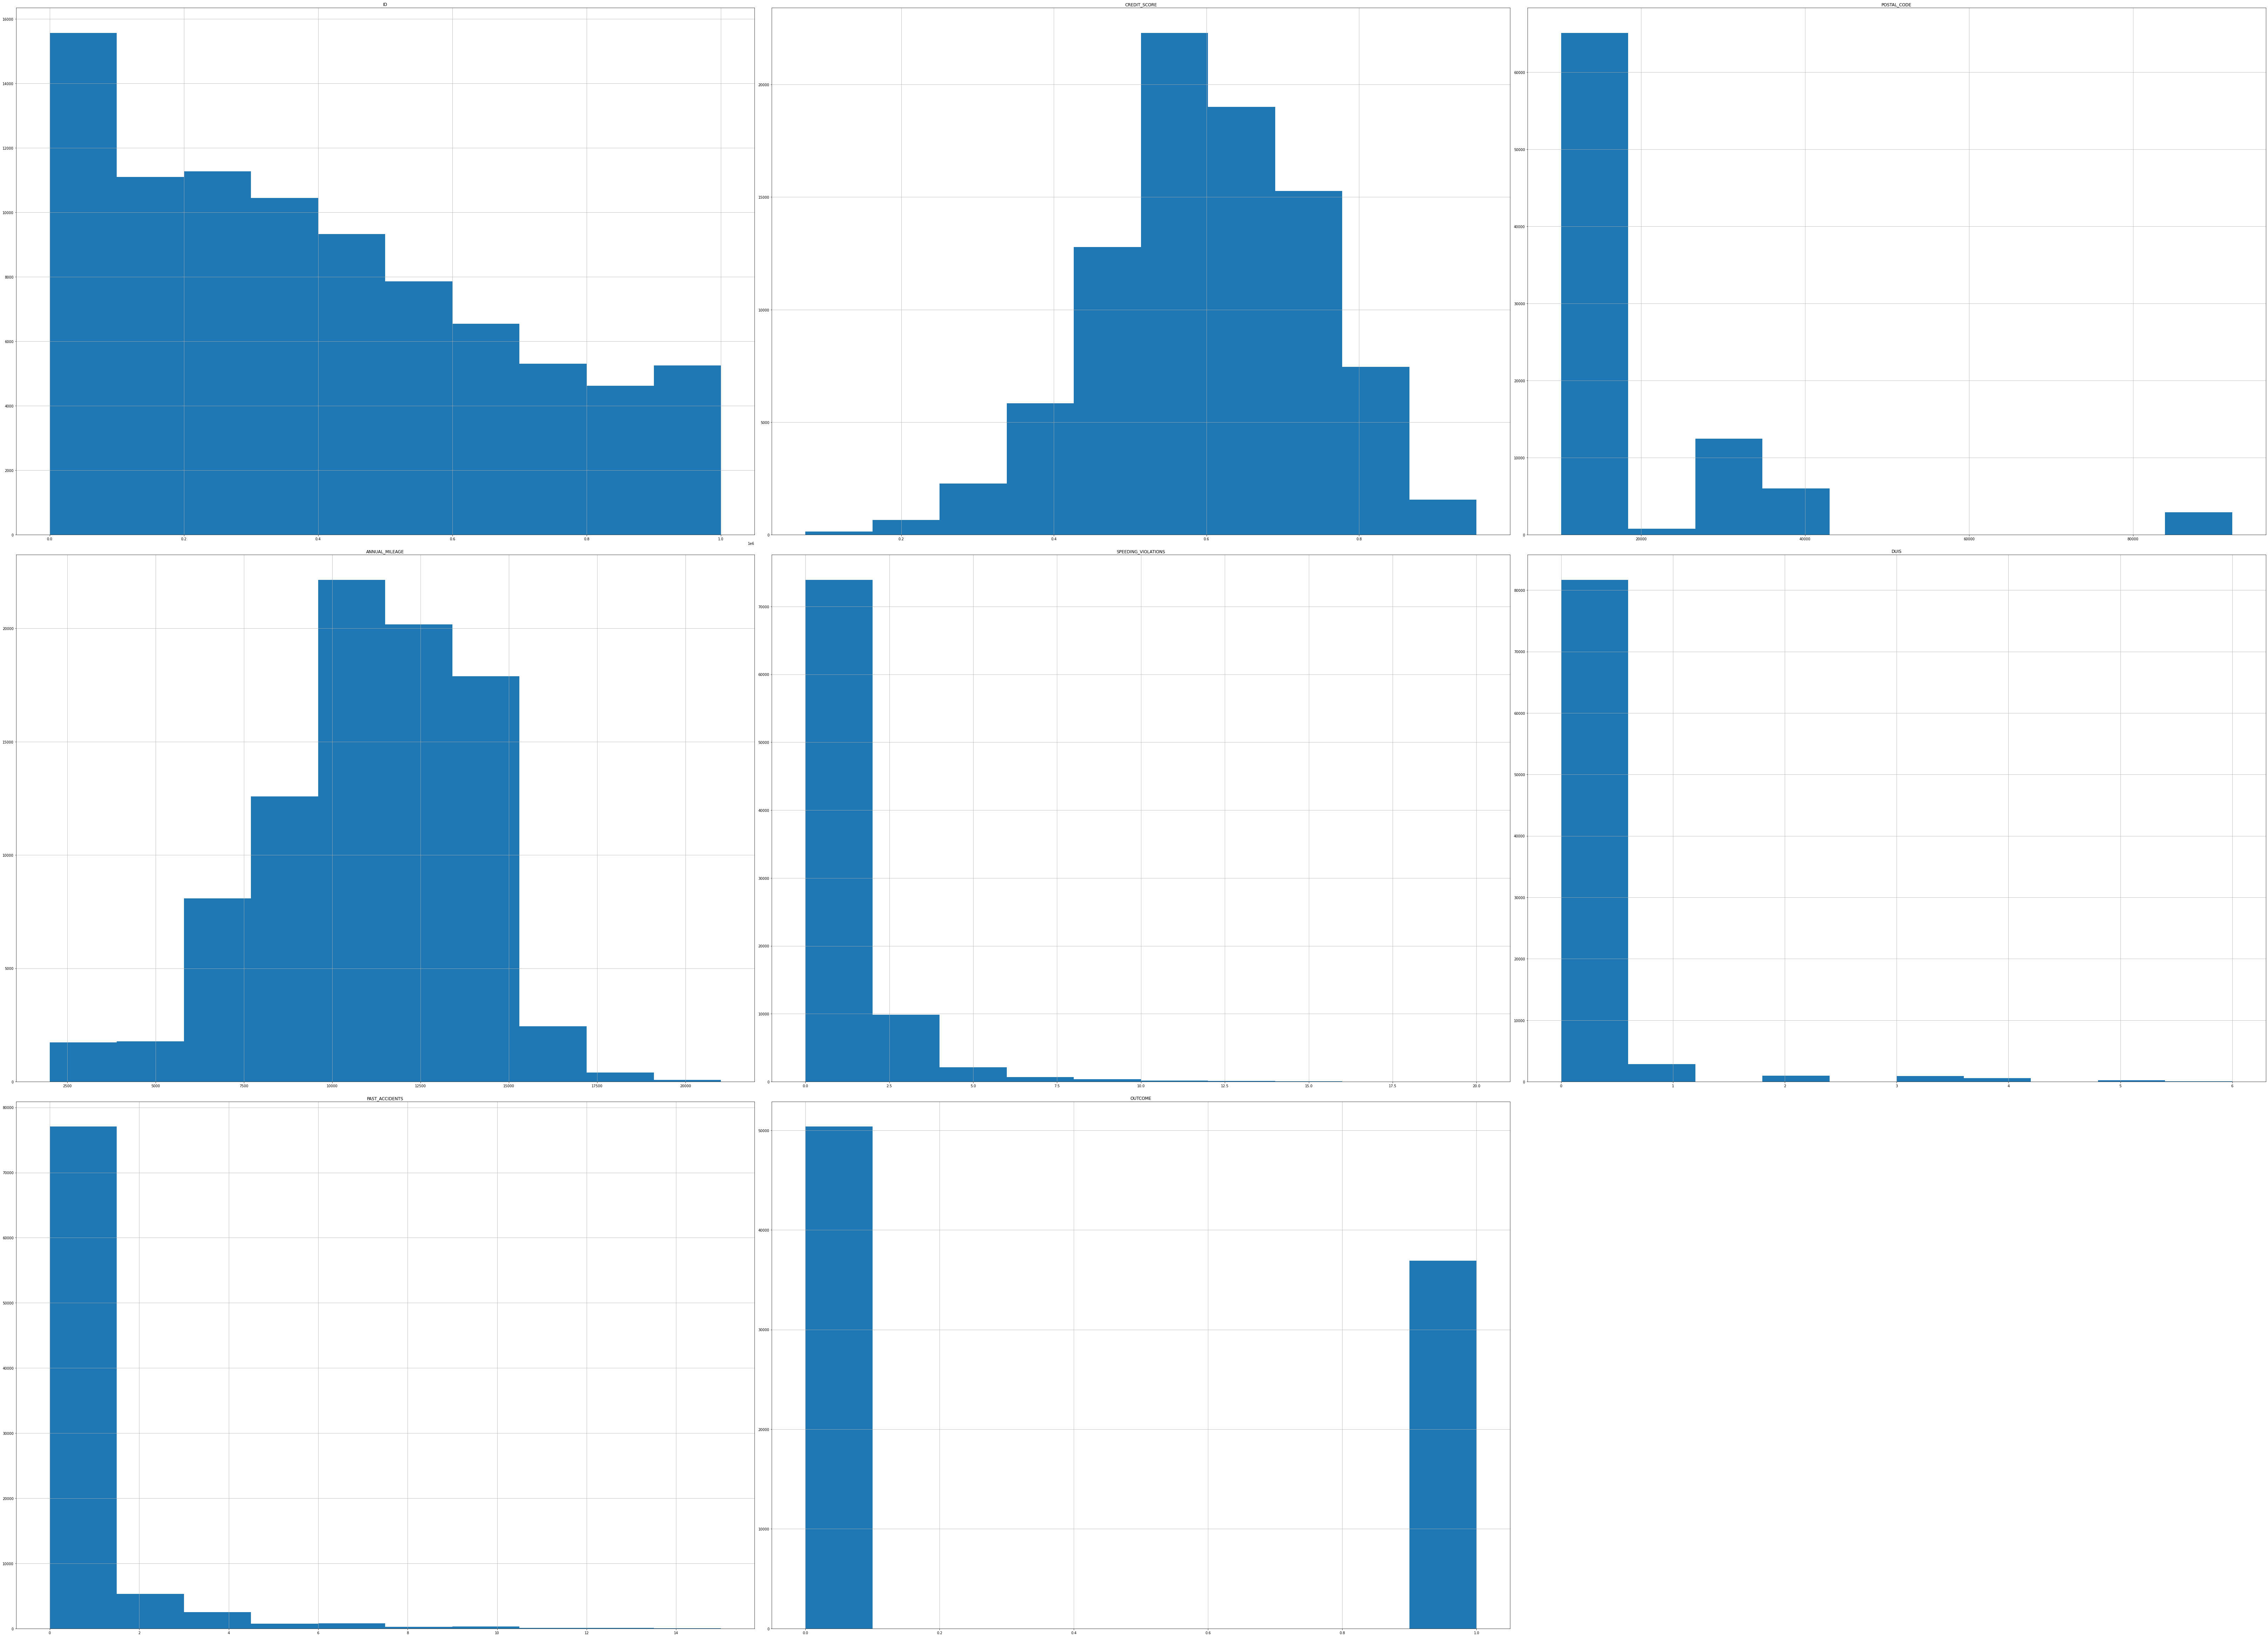

In [28]:
train_df.hist(figsize=(90,65))
plt.tight_layout()
plt.show()

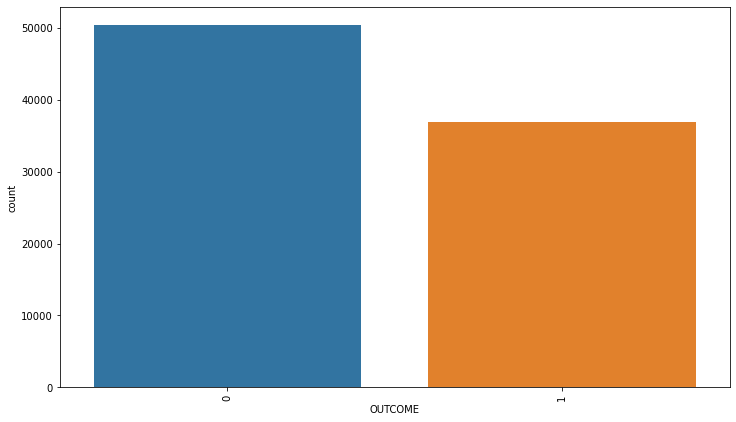

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_df,x='OUTCOME',order=train_df['OUTCOME'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

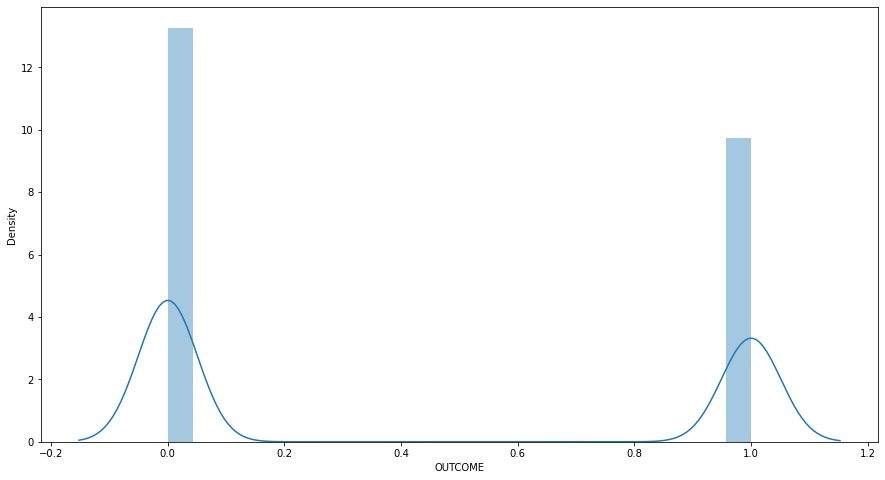

In [30]:
plt.figure(figsize=(15,8))
sns.distplot(train_df['OUTCOME'])
plt.show()

### Bivariate Analysis

<AxesSubplot:xlabel='DRIVING_EXPERIENCE', ylabel='OUTCOME'>

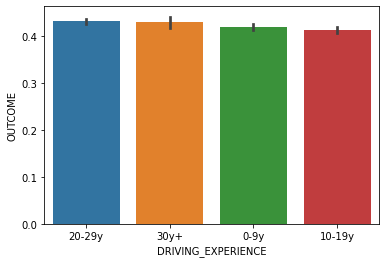

In [31]:
sns.barplot(y='OUTCOME',x='DRIVING_EXPERIENCE',data=train_df)

<AxesSubplot:xlabel='INCOME', ylabel='OUTCOME'>

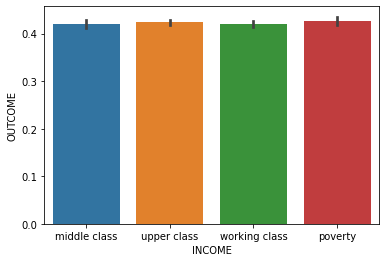

In [32]:
sns.barplot(y='OUTCOME',x='INCOME',data=train_df)

<AxesSubplot:xlabel='VEHICLE_YEAR', ylabel='OUTCOME'>

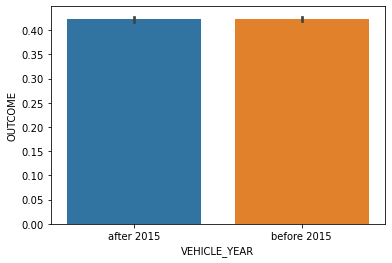

In [33]:
sns.barplot(y='OUTCOME',x='VEHICLE_YEAR',data=train_df)

<AxesSubplot:xlabel='DUIS', ylabel='OUTCOME'>

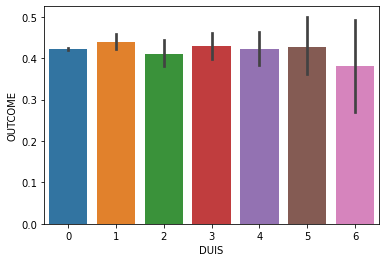

In [34]:
sns.barplot(y='OUTCOME',x='DUIS',data=train_df)

<AxesSubplot:xlabel='MARRIED', ylabel='OUTCOME'>

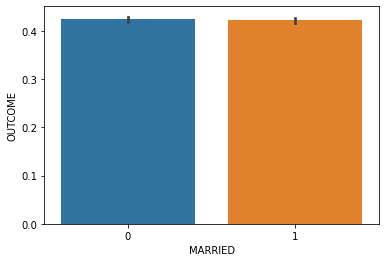

In [35]:
sns.barplot(y='OUTCOME',x='MARRIED',data=train_df)

### Multivariate Analysis

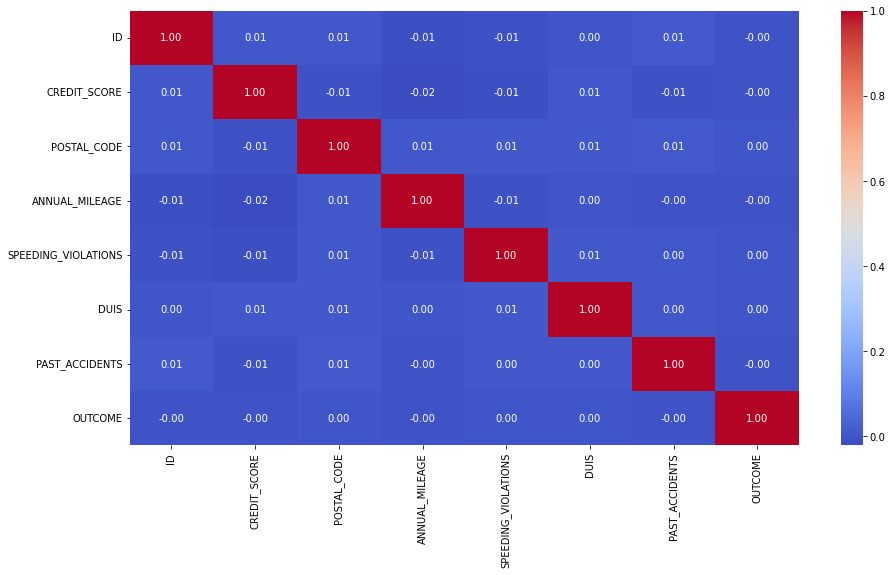

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [37]:
train_df_cat.head()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,TYPE_OF_VEHICLE
0,1,1,1,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,1,0,1
2,1,0,1,0,0,1,0,1,1,0
3,1,0,1,0,1,1,0,0,1,0
4,1,1,1,0,1,1,1,1,1,0


In [38]:
train_df_cat[['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
       'TYPE_OF_VEHICLE']]=train_df_cat[['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN',
       'TYPE_OF_VEHICLE']].astype(object)

In [39]:
train_df_cat.dtypes

AGE                   object
GENDER                object
DRIVING_EXPERIENCE    object
EDUCATION             object
INCOME                object
VEHICLE_OWNERSHIP     object
VEHICLE_YEAR          object
MARRIED               object
CHILDREN              object
TYPE_OF_VEHICLE       object
dtype: object

In [40]:
target = train_df['OUTCOME']

In [41]:
import category_encoders as ce

In [42]:
encoder = ce.cat_boost.CatBoostEncoder()
encoder.fit(train_df_cat,target)
df_encode= round(encoder.transform(train_df_cat),2)

### Scaling the numerical data

In [43]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scaled = ss.fit_transform(train_df_num.drop('OUTCOME',axis=1))

df_scaled = pd.DataFrame(df_scaled,columns=(train_df_num.drop('OUTCOME',axis=1)).columns)

In [44]:
train_df_final = pd.concat([df_scaled,df_encode,target],axis=1)

#### Dropping the redundant columns

In [45]:
train_df_final = train_df_final.drop(columns=['ID','POSTAL_CODE'])

In [46]:
train_df_final.head()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,TYPE_OF_VEHICLE,OUTCOME
0,0.261041,-0.018953,-0.489222,-0.219868,-0.390988,0.42,0.43,0.43,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0
1,-0.915986,-0.690761,-0.489222,-0.219868,-0.390988,0.42,0.42,0.43,0.42,0.42,0.42,0.42,0.42,0.42,0.43,1
2,1.724207,0.316951,-0.489222,-0.219868,-0.390988,0.42,0.42,0.43,0.42,0.42,0.42,0.42,0.42,0.42,0.42,1
3,0.583581,-1.698473,0.230863,-0.219868,-0.390988,0.42,0.42,0.43,0.42,0.42,0.42,0.42,0.42,0.42,0.42,1
4,-0.216599,1.324663,-0.489222,-0.219868,0.324561,0.42,0.43,0.43,0.42,0.42,0.42,0.42,0.42,0.42,0.42,0


In [47]:
train_df_final.shape

(87285, 16)

In [48]:
X = train_df_final.drop('OUTCOME', axis=1)
y = train_df_final['OUTCOME']

### Train test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=1)

In [51]:
print('Xtrain', Xtrain.shape)
print('Xtest', Xtest.shape)
print('ytrain', ytrain.shape)
print('ytest', ytest.shape)

Xtrain (65463, 15)
Xtest (21822, 15)
ytrain (65463,)
ytest (21822,)


### Check the balancing of dataset

In [52]:
train_df_final['OUTCOME'].value_counts(normalize=True)*100

0    57.704073
1    42.295927
Name: OUTCOME, dtype: float64

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
ros = RandomOverSampler(sampling_strategy=1) # float
X, y = ros.fit_resample(Xtrain, ytrain)
ax = y.value_counts(normalize=True)*100
print(ax)

1    50.0
0    50.0
Name: OUTCOME, dtype: float64


In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=1)

### Build a base Model with scaling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [57]:
model = LogisticRegression(max_iter=2000,random_state=1)

model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=2000, random_state=1)

In [58]:
y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train according to logistic regression:", accuracy_train)
print("Accuracy test according to logistic regression:", accuracy_test)
print("Classification Report (LogisticRegresiion):\n", classification_report_output)
print("Confusion Matrix (LogisticRegresiion):\n", conf_matrix)

Accuracy train according to logistic regression: 0.5049935708875698
Accuracy test according to logistic regression: 0.4986525759577279
Classification Report (LogisticRegresiion):
               precision    recall  f1-score   support

           0       0.51      0.34      0.41      9564
           1       0.49      0.66      0.56      9361

    accuracy                           0.50     18925
   macro avg       0.50      0.50      0.49     18925
weighted avg       0.50      0.50      0.49     18925

Confusion Matrix (LogisticRegresiion):
 [[3291 6273]
 [3215 6146]]


In [59]:
from sklearn.metrics import f1_score

In [60]:
f1_train = f1_score(ytrain, y_pred_train)
f1_test = f1_score(ytest, y_pred_test)

In [61]:
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.5719725238740727
F1 Score test : 0.5643709825528007


### Decision Tree with all feature

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DT_model = DecisionTreeClassifier(random_state=1)

In [64]:
DT_model.fit(Xtrain,ytrain)

y_pred_train_dt = DT_model.predict(Xtrain)
y_pred_test_dt = DT_model.predict(Xtest)

In [65]:
classification_report_out = classification_report(ytest, y_pred_test_dt)

In [66]:
print("Classification Report(Decision Tree):\n", classification_report_out)

Classification Report(Decision Tree):
               precision    recall  f1-score   support

           0       0.63      0.55      0.59      9564
           1       0.59      0.67      0.63      9361

    accuracy                           0.61     18925
   macro avg       0.61      0.61      0.61     18925
weighted avg       0.61      0.61      0.61     18925



In [67]:
f1_train = f1_score(ytrain, y_pred_train_dt)
f1_test = f1_score(ytest, y_pred_test_dt)

In [68]:
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.9999824484422992
F1 Score test : 0.6278216278719018


In [69]:
accuracy_train = accuracy_score(ytrain, y_pred_train_dt)
accuracy_test = accuracy_score(ytest, y_pred_test_dt)

In [70]:
print("Accuracy train:", accuracy_train)
print("Accuracy test", accuracy_test)

Accuracy train: 0.9999823859933419
Accuracy test 0.6088243064729194


### Decision Tree with important feature

In [71]:
important_features = pd.DataFrame({'Features': Xtrain.columns,
                                   'Importance': DT_model.feature_importances_})

imp_feature = important_features.sort_values(by='Importance', ascending=False)[:10]['Features']

In [72]:
DT = DecisionTreeClassifier(random_state=1)

DT.fit(Xtrain[imp_feature],ytrain)

y_pred_train = DT.predict(Xtrain[imp_feature])
y_pred_test = DT.predict(Xtest[imp_feature])

In [73]:
f1_train = f1_score(ytrain, y_pred_train)
f1_test = f1_score(ytest, y_pred_test)

In [74]:
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.9999824484422992
F1 Score test : 0.6278846639398071


In [75]:
accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)

In [76]:
print("Accuracy train:", accuracy_train)
print("Accuracy test", accuracy_test)

Accuracy train: 0.9999823859933419
Accuracy test 0.6106208718626156


In [77]:
classification_report_out = classification_report(ytest, y_pred_test)
print("Classification Report\n", classification_report_out)

Classification Report
               precision    recall  f1-score   support

           0       0.63      0.56      0.59      9564
           1       0.60      0.66      0.63      9361

    accuracy                           0.61     18925
   macro avg       0.61      0.61      0.61     18925
weighted avg       0.61      0.61      0.61     18925



### Decision tree with GINI

In [78]:
classifier = DecisionTreeClassifier(criterion = 'gini' , random_state = 1)
classifier.fit(Xtrain, ytrain)

y_pred_train = classifier.predict(Xtrain)
y_pred_test = classifier.predict(Xtest)

In [79]:
accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train according to Decision tree:", accuracy_train)
print("Accuracy test according to Decision tree:", accuracy_test)
print("Classification Report (Decision tree):\n", classification_report_output)
print("Confusion Matrix (Decision tree):\n", conf_matrix)

Accuracy train according to Decision tree: 0.9999823859933419
Accuracy test according to Decision tree: 0.6088243064729194
Classification Report (Decision tree):
               precision    recall  f1-score   support

           0       0.63      0.55      0.59      9564
           1       0.59      0.67      0.63      9361

    accuracy                           0.61     18925
   macro avg       0.61      0.61      0.61     18925
weighted avg       0.61      0.61      0.61     18925

Confusion Matrix (Decision tree):
 [[5278 4286]
 [3117 6244]]


In [80]:
f1_train = f1_score(ytrain, y_pred_train)
f1_test = f1_score(ytest, y_pred_test)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.9999824484422992
F1 Score test : 0.6278216278719018


### Decision tree with Entropy

In [81]:
classifier = DecisionTreeClassifier(criterion = 'entropy' , random_state = 1)
classifier.fit(Xtrain, ytrain)

y_pred_train = classifier.predict(Xtrain)
y_pred_test = classifier.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train ", accuracy_train)
print("Accuracy test :", accuracy_test)
print("Classification Report :\n", classification_report_output)
print("Confusion Matrix :\n", conf_matrix)

Accuracy train  0.9999823859933419
Accuracy test : 0.6129458388375165
Classification Report :
               precision    recall  f1-score   support

           0       0.63      0.56      0.59      9564
           1       0.60      0.67      0.63      9361

    accuracy                           0.61     18925
   macro avg       0.61      0.61      0.61     18925
weighted avg       0.62      0.61      0.61     18925

Confusion Matrix :
 [[5345 4219]
 [3106 6255]]


In [82]:
f1_train = f1_score(ytrain, y_pred_train)
f1_test = f1_score(ytest, y_pred_test)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.9999824484422992
F1 Score test : 0.630703302243509


#### Lets use GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = [{'criterion': ['entropy'],
                     'max_depth': [5,10],  
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2,5,8], 
                     'min_samples_leaf': [1,5,9], 
                     'max_leaf_nodes': [5,8]}]


DT = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = DT,
                         param_grid = param_grid,
                         cv = 5)

tree_grid_model = tree_grid.fit(Xtrain, ytrain)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_)

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [85]:
dtr = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, max_features= 'sqrt', 
                             max_leaf_nodes= 5, min_samples_leaf= 1, min_samples_split= 2)

In [86]:
dtr.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=5)

In [87]:
y_pred_train = dtr.predict(Xtrain)
y_pred_test = dtr.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train GridSearchCV:", accuracy_train)
print("Accuracy test GridSearchCV:", accuracy_test)
print("Classification Report GridSearchCV:\n", classification_report_output)
print("Confusion Matrix GridSearchCV:\n", conf_matrix)

Accuracy train GridSearchCV: 0.5066845155267469
Accuracy test GridSearchCV: 0.5124966974900925
Classification Report GridSearchCV:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      9564
           1       0.51      0.46      0.48      9361

    accuracy                           0.51     18925
   macro avg       0.51      0.51      0.51     18925
weighted avg       0.51      0.51      0.51     18925

Confusion Matrix GridSearchCV:
 [[5384 4180]
 [5046 4315]]


In [88]:
f1_train = f1_score(ytrain, y_pred_train)
f1_test = f1_score(ytest, y_pred_test)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.4790073850847332
F1 Score test : 0.4833109318996416


### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier( random_state = 1)
RF.fit(Xtrain, ytrain)

y_pred_train_rf = RF.predict(Xtrain)
y_pred_test_rf = RF.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train_rf)
accuracy_test = accuracy_score(ytest, y_pred_test_rf)
classification_report_output = classification_report(ytest, y_pred_test_rf)
conf_matrix = confusion_matrix(ytest, y_pred_test_rf)

print("Accuracy train according to Random Forest:", accuracy_train)
print("Accuracy test according to Random Forest:", accuracy_test)
print("Classification Report (Random Forest):\n", classification_report_output)
print("Confusion Matrix (Random Forest):\n", conf_matrix)

Accuracy train according to Random Forest: 0.9998767019533933
Accuracy test according to Random Forest: 0.6157992073976222
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      9564
           1       0.60      0.67      0.63      9361

    accuracy                           0.62     18925
   macro avg       0.62      0.62      0.62     18925
weighted avg       0.62      0.62      0.61     18925

Confusion Matrix (Random Forest):
 [[5408 4156]
 [3115 6246]]


In [90]:
f1_train = f1_score(ytrain, y_pred_train_rf)
f1_test = f1_score(ytest, y_pred_test_rf)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.9998771434087439
F1 Score test : 0.6320902696958963


### Random Forest method with important feature

In [91]:
imp_feat = pd.DataFrame({"Importance":RF.feature_importances_,'Feature':Xtrain.columns})
imp_feature = imp_feat.sort_values(by='Importance',ascending=False)[:8]['Feature']

In [92]:
RF_model = RF.fit(Xtrain[imp_feature],ytrain)

In [93]:
y_pred_train_rfi = RF_model.predict(Xtrain[imp_feature])
y_pred_test_rfi = RF_model.predict(Xtest[imp_feature])

accuracy_train = accuracy_score(ytrain, y_pred_train_rfi)
accuracy_test = accuracy_score(ytest, y_pred_test_rfi)
classification_report_output = classification_report(ytest, y_pred_test_rfi)
conf_matrix = confusion_matrix(ytest, y_pred_test_rfi)

print("Accuracy train according to Random Forest:", accuracy_train)
print("Accuracy test according to Random Forest:", accuracy_test)
print("Classification Report (Random Forest):\n", classification_report_output)
print("Confusion Matrix (Random Forest):\n", conf_matrix)

Accuracy train according to Random Forest: 0.9998767019533933
Accuracy test according to Random Forest: 0.6155878467635403
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      9564
           1       0.60      0.67      0.63      9361

    accuracy                           0.62     18925
   macro avg       0.62      0.62      0.61     18925
weighted avg       0.62      0.62      0.61     18925

Confusion Matrix (Random Forest):
 [[5408 4156]
 [3119 6242]]


In [94]:
f1_train = f1_score(ytrain, y_pred_train_rfi)
f1_test = f1_score(ytest, y_pred_test_rfi)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.9998771347831429
F1 Score test : 0.6318133508780809


Lets Use GridSearchCV

In [95]:
param_grid = [{"max_depth": [None,3,4,5,6],
       "max_features":['auto', 'sqrt', 'log2']}]

rfr = RandomForestClassifier(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [96]:
grid_search.fit(Xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid=[{'max_depth': [None, 3, 4, 5, 6],
                          'max_features': ['auto', 'sqrt', 'log2']}])

In [97]:
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'auto'}


In [98]:
rfr = RandomForestClassifier(max_depth= None, max_features= 'auto',random_state=1)

In [99]:
rfr.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=5, random_state=1)

In [100]:
y_pred_train_rfg = rfr.predict(Xtrain)
y_pred_test_rfg = rfr.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train_rfg)
accuracy_test = accuracy_score(ytest, y_pred_test_rfg)
classification_report_output = classification_report(ytest, y_pred_test_rfg)
conf_matrix = confusion_matrix(ytest, y_pred_test_rfg)

print("Accuracy train according to Random Forest GridSearchCV:", accuracy_train)
print("Accuracy test according to Random Forest GridSearchCV:", accuracy_test)
print("Classification Report (Random Forest GridSearchCV):\n", classification_report_output)
print("Confusion Matrix (Random Forest GridSearchCV):\n", conf_matrix)

Accuracy train according to Random Forest GridSearchCV: 0.5301639864019868
Accuracy test according to Random Forest GridSearchCV: 0.5080052840158521
Classification Report (Random Forest GridSearchCV):
               precision    recall  f1-score   support

           0       0.52      0.39      0.44      9564
           1       0.50      0.63      0.56      9361

    accuracy                           0.51     18925
   macro avg       0.51      0.51      0.50     18925
weighted avg       0.51      0.51      0.50     18925

Confusion Matrix (Random Forest GridSearchCV):
 [[3721 5843]
 [3468 5893]]


In [101]:
f1_train = f1_score(ytrain, y_pred_train_rfg)
f1_test = f1_score(ytest, y_pred_test_rfg)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.5800428238554065
F1 Score test : 0.558657629046784


### Stochastic Gradient Descent¶

In [102]:
from sklearn.linear_model import SGDClassifier

In [103]:
sgd = SGDClassifier()

sgd.fit(Xtrain, ytrain)

SGDClassifier()

In [104]:
y_pred_train_sg = sgd.predict(Xtrain)
y_pred_test_sg = sgd.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train_sg)
accuracy_test = accuracy_score(ytest, y_pred_test_sg)
classification_report_output = classification_report(ytest, y_pred_test_sg)
conf_matrix = confusion_matrix(ytest, y_pred_test_sg)

print("Accuracy train according to Stochastic Gradient Descent:", accuracy_train)
print("Accuracy test according to Stochastic Gradient Descent:", accuracy_test)
print("Classification Report (Stochastic Gradient Descent):\n", classification_report_output)
print("Confusion Matrix (Stochastic Gradient Descent):\n", conf_matrix)

Accuracy train according to Stochastic Gradient Descent: 0.5027742060486499
Accuracy test according to Stochastic Gradient Descent: 0.49743725231175695
Classification Report (Stochastic Gradient Descent):
               precision    recall  f1-score   support

           0       0.52      0.06      0.11      9564
           1       0.50      0.94      0.65      9361

    accuracy                           0.50     18925
   macro avg       0.51      0.50      0.38     18925
weighted avg       0.51      0.50      0.38     18925

Confusion Matrix (Stochastic Gradient Descent):
 [[ 599 8965]
 [ 546 8815]]


In [105]:
f1_train = f1_score(ytrain, y_pred_train_sg)
f1_test = f1_score(ytest, y_pred_test_sg)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.6553446065563763
F1 Score test : 0.6495707601046388


GridSearchCV for Stochastic Gradient Descent

In [106]:
sgd = SGDClassifier(random_state=123)
estimator = sgd

params = ({'l1_ratio':[0.1,0.01,0.001,0.2,0.3,0.5,0.7,0.8,0.9,0.25],
          'penalty':['l1','l2','elasticnet'],
          'loss':['squared_error','huber'],
          'alpha':[0.1,0.2,0.9,1,2,3,4,5,6,7,8,9,10]})

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
grid_sgd = RandomizedSearchCV(estimator=sgd,param_distributions=params,cv=5)

grid_sgd.fit(Xtrain,ytrain)
print(grid_sgd.best_params_)

{'penalty': 'elasticnet', 'loss': 'huber', 'l1_ratio': 0.1, 'alpha': 10}


In [109]:
sgd = SGDClassifier(penalty= 'elasticnet', loss= 'huber', l1_ratio= 0.1, alpha= 10,random_state=1)

In [110]:
sgd.fit(Xtrain,ytrain)

SGDClassifier(alpha=0.9, l1_ratio=0.5, loss='squared_error',
              penalty='elasticnet', random_state=1)

In [111]:
y_pred_train_sg1 = sgd.predict(Xtrain)
y_pred_test_sg1 = sgd.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train_sg1)
accuracy_test = accuracy_score(ytest, y_pred_test_sg1)
classification_report_output = classification_report(ytest, y_pred_test_sg1)
conf_matrix = confusion_matrix(ytest, y_pred_test_sg1)

print("Accuracy train according to Stochastic Gradient Descent:", accuracy_train)
print("Accuracy test according to Stochastic Gradient Descent:", accuracy_test)
print("Classification Report (Stochastic Gradient Descent):\n", classification_report_output)
print("Confusion Matrix (Stochastic Gradient Descent):\n", conf_matrix)

Accuracy train according to Stochastic Gradient Descent: 0.5017878216757966
Accuracy test according to Stochastic Gradient Descent: 0.4946367239101717
Classification Report (Stochastic Gradient Descent):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9564
           1       0.49      1.00      0.66      9361

    accuracy                           0.49     18925
   macro avg       0.25      0.50      0.33     18925
weighted avg       0.24      0.49      0.33     18925

Confusion Matrix (Stochastic Gradient Descent):
 [[   0 9564]
 [   0 9361]]


In [112]:
f1_train = f1_score(ytrain, y_pred_train_sg1)
f1_test = f1_score(ytest, y_pred_test_sg1)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.668253949636997
F1 Score test : 0.6618822032100686


### XGBoost

In [113]:
from xgboost import XGBClassifier
import xgboost as xgb

In [114]:
xgb1 = xgb.XGBClassifier(n_estimators=100,random_state=42)

xgb1.fit(Xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [115]:
y_pred_train_xgb = xgb1.predict(Xtrain)
y_pred_test_xgb = xgb1.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test_xgb)
conf_matrix = confusion_matrix(ytest, y_pred_test_xgb)

print("Accuracy train according to Xtreme Gradient Boosting:", accuracy_train)
print("Accuracy test according to Xtreme Gradient Boosting:", accuracy_test)
print("Classification Report (Xtreme Gradient Boosting):\n", classification_report_output)
print("Confusion Matrix (Xtreme Gradient Boosting):\n", conf_matrix)

Accuracy train according to Xtreme Gradient Boosting: 0.5066845155267469
Accuracy test according to Xtreme Gradient Boosting: 0.5124966974900925
Classification Report (Xtreme Gradient Boosting):
               precision    recall  f1-score   support

           0       0.53      0.50      0.51      9564
           1       0.52      0.54      0.53      9361

    accuracy                           0.52     18925
   macro avg       0.52      0.52      0.52     18925
weighted avg       0.52      0.52      0.52     18925

Confusion Matrix (Xtreme Gradient Boosting):
 [[4803 4761]
 [4304 5057]]


In [116]:
f1_train = f1_score(ytrain, y_pred_train_xgb)
f1_test = f1_score(ytest, y_pred_test_xgb)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.6358879547912234
F1 Score test : 0.5273476197924812


### Gradient Boosting

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
gbm= GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 123) 
gbm.fit(Xtrain,ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=123)

In [119]:
y_pred_train = gbm.predict(Xtrain)
y_pred_test = gbm.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train according to Gradient Boosting:", accuracy_train)
print("Accuracy test according to Gradient Boosting:", accuracy_test)
print("Classification Report Gradient Boosting:\n", classification_report_output)
print("Confusion Matrix Gradient Boosting:\n", conf_matrix)

Accuracy train according to Gradient Boosting: 0.7745935567963644
Accuracy test according to Gradient Boosting: 0.5671334214002642
Classification Report Gradient Boosting:
               precision    recall  f1-score   support

           0       0.58      0.53      0.56      9564
           1       0.56      0.60      0.58      9361

    accuracy                           0.57     18925
   macro avg       0.57      0.57      0.57     18925
weighted avg       0.57      0.57      0.57     18925

Confusion Matrix Gradient Boosting:
 [[5116 4448]
 [3744 5617]]


In [120]:
f1_train = f1_score(ytrain, y_pred_train)
f1_test = f1_score(ytest, y_pred_test)
print("F1 Score train:", f1_train)
print("F1 Score test :", f1_test)

F1 Score train: 0.7774550892996887
F1 Score test : 0.5782971275610007


RandomizedSearchCV for Gradient Boosting

In [121]:
params=({'n_estimators': [25, 50, 75],  
        'learning_rate': [0.1],   
        'max_depth': [3, 5, 7] 
        })


In [122]:
from sklearn.model_selection import RandomizedSearchCV

In [123]:
grid_gbm= RandomizedSearchCV(estimator=gbm,
                       param_distributions=params,
                       cv=5,random_state=42)

grid_gbm.fit(Xtrain,ytrain)
print(grid_gbm.best_params_)

{'n_estimators': 75, 'max_depth': 7, 'learning_rate': 0.1}


In [124]:
gbm = GradientBoostingClassifier(n_estimators= 75, max_depth= 7, learning_rate= 0.1,random_state=123)

In [125]:
gbm.fit(Xtrain, ytrain)

GradientBoostingClassifier(n_estimators=25, random_state=123)

In [126]:
y_pred_train = gbm.predict(Xtrain)
y_pred_test = gbm.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train according to Gradient Boosting:", accuracy_train)
print("Accuracy test according to Gradient Boosting:", accuracy_test)
print("Classification Report Gradient Boosting:\n", classification_report_output)
print("Confusion Matrix Gradient Boosting:\n", conf_matrix)

Accuracy train according to Gradient Boosting: 0.5235058918852271
Accuracy test according to Gradient Boosting: 0.5105944517833554
Classification Report Gradient Boosting:
               precision    recall  f1-score   support

           0       0.52      0.44      0.48      9564
           1       0.50      0.58      0.54      9361

    accuracy                           0.51     18925
   macro avg       0.51      0.51      0.51     18925
weighted avg       0.51      0.51      0.51     18925

Confusion Matrix Gradient Boosting:
 [[4197 5367]
 [3895 5466]]


###  KNN Classifier with all feature

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
KNeighborsClassifier()

KNeighborsClassifier()

In [129]:
knn= KNeighborsClassifier(n_neighbors = 3)

knn_model = knn.fit(Xtrain, ytrain)

In [130]:
y_pred_train = knn.predict(Xtrain)
y_pred_test = knn.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train according to KNN classifier:", accuracy_train)
print("Accuracy test according to KNN classifier:", accuracy_test)
print("Classification Report KNN classifier:\n", classification_report_output)
print("Confusion Matrix KNN classifier:\n", conf_matrix)

Accuracy train according to KNN classifier: 0.7800891268736899
Accuracy test according to KNN classifier: 0.5567239101717305
Classification Report KNN classifier:
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      9564
           1       0.55      0.60      0.57      9361

    accuracy                           0.56     18925
   macro avg       0.56      0.56      0.56     18925
weighted avg       0.56      0.56      0.56     18925

Confusion Matrix KNN classifier:
 [[4947 4617]
 [3772 5589]]


Optimal Value of K (using RandomizedSearchCV)

In [131]:
param_grid = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan']}

knn_classification = KNeighborsClassifier()

knn_grid = RandomizedSearchCV(estimator = knn_classification,
                        param_distributions= param_grid,
                        cv = 5,
                        scoring =f1_score)

knn_grid.fit(Xtrain, ytrain)

print('Best parameters for KNN Classifier: ', knn_grid.best_params_)

Best parameters for KNN Classifier:  {'n_neighbors': 15, 'metric': 'manhattan'}


In [132]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15)

In [133]:
knn.fit(Xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [134]:
y_pred_train = knn.predict(Xtrain)
y_pred_test = knn.predict(Xtest)

accuracy_train = accuracy_score(ytrain, y_pred_train)
accuracy_test = accuracy_score(ytest, y_pred_test)
classification_report_output = classification_report(ytest, y_pred_test)
conf_matrix = confusion_matrix(ytest, y_pred_test)

print("Accuracy train according to KNN classifier:", accuracy_train)
print("Accuracy test according to KNN classifier:", accuracy_test)
print("Classification Report KNN classifier:\n", classification_report_output)
print("Confusion Matrix KNN classifier:\n", conf_matrix)

Accuracy train according to KNN classifier: 1.0
Accuracy test according to KNN classifier: 0.6085072655217966
Classification Report KNN classifier:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59      9564
           1       0.59      0.66      0.63      9361

    accuracy                           0.61     18925
   macro avg       0.61      0.61      0.61     18925
weighted avg       0.61      0.61      0.61     18925

Confusion Matrix KNN classifier:
 [[5317 4247]
 [3162 6199]]


### AdaBoost with all feature

In [135]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1).fit(Xtrain,ytrain)

In [136]:
y_pred_ada=ada.predict(Xtest)
print(classification_report(ytest,y_pred_ada))

              precision    recall  f1-score   support

           0       0.52      0.49      0.50      9564
           1       0.51      0.54      0.52      9361

    accuracy                           0.51     18925
   macro avg       0.51      0.51      0.51     18925
weighted avg       0.51      0.51      0.51     18925



#### Hyperparameter tuning

In [137]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1]
             }

In [138]:
grid_search = RandomizedSearchCV(estimator=ada, param_distributions=param_grid, n_jobs=1, cv=5, scoring=f1_score)

In [139]:
grid_search.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [40, 50, 80, 100]},
                   scoring=<function f1_score at 0x00000266E61AA8B0>)

In [140]:
print(grid_search.best_params_)

{'n_estimators': 40, 'learning_rate': 0.1}


In [141]:
ada1=AdaBoostClassifier(random_state=1,learning_rate=0.1,n_estimators=40).fit(Xtrain,ytrain)

In [142]:
y_pred_ada1=ada1.predict(Xtest)
print(classification_report(ytest,y_pred_ada1))

              precision    recall  f1-score   support

           0       0.51      0.31      0.39      9564
           1       0.50      0.70      0.58      9361

    accuracy                           0.50     18925
   macro avg       0.51      0.51      0.49     18925
weighted avg       0.51      0.50      0.48     18925



In [143]:
test_df.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,TYPE_OF_VEHICLE
0,303713,16-25,male,10-19y,high school,middle class,0.424958,1,before 2015,1,0,10238,13000,0,0,0,Sports Car
1,141107,16-25,male,20-29y,high school,working class,0.503478,0,before 2015,1,1,10238,14000,0,0,0,SUV
2,447316,26-39,female,20-29y,high school,upper class,0.252246,1,before 2015,1,0,10238,10000,0,0,0,HatchBack
3,196066,16-25,female,20-29y,university,middle class,0.464749,1,before 2015,1,1,10238,7000,0,1,0,SUV
4,179947,16-25,male,20-29y,high school,working class,0.452968,1,after 2015,0,1,10238,13000,1,0,0,SUV


In [144]:
test_df.dtypes

ID                       int64
AGE                     object
GENDER                  object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR            object
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE           int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
TYPE_OF_VEHICLE         object
dtype: object

In [145]:
train_df_final.dtypes

CREDIT_SCORE           float64
ANNUAL_MILEAGE         float64
SPEEDING_VIOLATIONS    float64
DUIS                   float64
PAST_ACCIDENTS         float64
AGE                    float64
GENDER                 float64
DRIVING_EXPERIENCE     float64
EDUCATION              float64
INCOME                 float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR           float64
MARRIED                float64
CHILDREN               float64
TYPE_OF_VEHICLE        float64
OUTCOME                  int64
dtype: object

In [146]:
xtst=pd.DataFrame({'OUTCOME':y_pred_test_sg1})

In [147]:
xtst.to_csv('test_df1.csv',index=False)

In [148]:
test_df1=pd.read_csv('test_df1.csv')

In [149]:
result_df = pd.DataFrame({'ID': test_df['ID'], 'OUTCOME': test_df1['OUTCOME']})

In [150]:
result_df.head()

,ID,OUTCOME
0,303713.0,1
1,141107.0,1
2,447316.0,1
3,196066.0,1
4,179947.0,1


In [151]:
result_df.to_csv('result3_df.csv',index=False)

* Best F1 score is for stochastic Gradient descent with fine tuning parameter.